# Importing Dependencies

In [1]:
import tensorflow as tf

In [2]:
import sys
print(sys.version)


3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]


In [3]:
tf.__version__

'2.10.0'

In [4]:
print(tf.test.is_gpu_available())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [6]:
print(tf.test.is_built_with_cuda())

True


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import LearningRateScheduler
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense ,GlobalAveragePooling1D, Embedding , Flatten
from sklearn.model_selection import train_test_split 
from nltk.corpus import stopwords


In [9]:
data = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin-1')

In [10]:
data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

<Axes: xlabel='Sentiment', ylabel='count'>

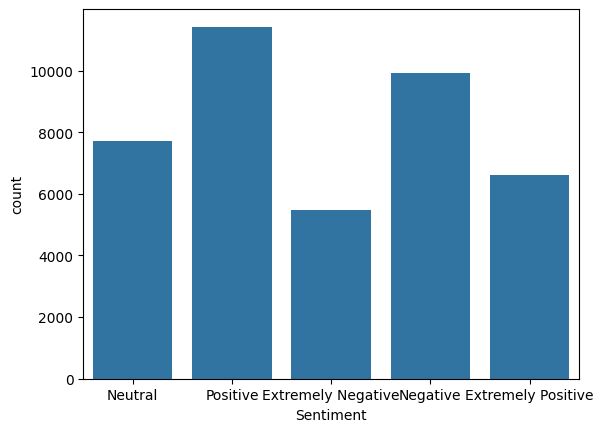

In [11]:
sns.countplot(x ='Sentiment', data = data )

In [12]:
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [13]:
data.shape

(41157, 6)

In [14]:
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [15]:
data['OriginalTweet'][0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

As we can see that the data contains unwanted tags which can ne a problem for Neural Networks, so we have to remove them


# Data Preproceessing

In [16]:
data = data[['OriginalTweet','Sentiment']]

In [17]:
data.head()

OriginalTweet           Sentiment
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral
1  advice Talk to your neighbours family to excha...            Positive
2  Coronavirus Australia: Woolworths to give elde...            Positive
3  My food stock is not the only one which is emp...            Positive
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [18]:
data.tail()

OriginalTweet           Sentiment
41152  Airline pilots offering to stock supermarket s...             Neutral
41153  Response to complaint not provided citing COVI...  Extremely Negative
41154  You know itÃ‚Â’s getting tough when @KameronWild...            Positive
41155  Is it wrong that the smell of hand sanitizer i...             Neutral
41156  @TartiiCat Well new/used Rift S are going for ...            Negative

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\MIR
[nltk_data]     FAISAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
def preprocess_text(text):
    text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters
    text = re.sub('[^a-zA-Z]', ' ', text) # Remove punctuations and numbers
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*') #Removing stopwords
    text = pattern.sub('', text)
    return text

In [21]:
data['cleaned tweets'] = data['OriginalTweet'].apply(preprocess_text)

In [22]:
sentiment_mapping = {'Neutral': 2, 'Positive': 1,'Negative': 0, 'Extremely Positive': 3,'Extremely Negative': 4}

In [23]:
data['Sentiment'] = data['Sentiment'].replace(sentiment_mapping)

C:\Users\MIR FAISAL\AppData\Local\Temp\ipykernel_18200\2575235717.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sentiment'] = data['Sentiment'].replace(sentiment_mapping)


In [24]:
data.head(15)

OriginalTweet  Sentiment  \
0   @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...          2   
1   advice Talk to your neighbours family to excha...          1   
2   Coronavirus Australia: Woolworths to give elde...          1   
3   My food stock is not the only one which is emp...          1   
4   Me, ready to go at supermarket during the #COV...          4   
5   As news of the regionÃ‚Â’s first confirmed COVID...          1   
6   Cashier at grocery store was sharing his insig...          1   
7   Was at the supermarket today. Didn't buy toile...          2   
8   Due to COVID-19 our retail store and classroom...          1   
9   For corona prevention,we should stop to buy th...          0   
10  All month there hasn't been crowding in the su...          2   
11  Due to the Covid-19 situation, we have increas...          3   
12  #horningsea is a caring community. LetÃ‚Â’s ALL ...          3   
13  Me: I don't need to stock up on food, I'll jus...          1   
14  ADARA Releases COVID-19 Resource Center for Tr...          1   

                                       cleaned tweets  
0                                                      
1   advice Talk neighbours family exchange phone n...  
2   Coronavirus Australia Woolworths give elderly ...  
3   My food stock one empty      PLEASE dont panic...  
4   Me ready go supermarket COVID outbreak      No...  
5   As news regions first confirmed COVID case cam...  
6   Cashier grocery store sharing insights Covid T...  
7   Was supermarket today Didnt buy toilet paper R...  
8   Due COVID retail store classroom Atlanta open ...  
9   For corona preventionwe stop buy things cash u...  
10  All month hasnt crowding supermarkets restaura...  
11  Due Covid situation increased demand food prod...  
12  horningsea caring community Lets ALL look less...  
13  Me I dont need stock food Ill Amazon deliver w...  
14  ADARA Releases COVID Resource Center Travel Br...

In [25]:
X_train= data['cleaned tweets']

In [26]:
data['cleaned tweets'][7]

'Was supermarket today Didnt buy toilet paper Rebel      toiletpapercrisis covid '

In [27]:
y_train = data['Sentiment']
y_train[0]

2

# Preparing Test Data

In [28]:
data2 = pd.read_csv('Corona_NLP_test.csv',encoding = 'latin-1')

In [29]:
data2.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral

In [30]:
data2['cleaned tweets'] = data2['OriginalTweet'].apply(preprocess_text)

In [31]:
data2['Sentiment'] = data2['Sentiment'].replace(sentiment_mapping)

C:\Users\MIR FAISAL\AppData\Local\Temp\ipykernel_18200\2554503750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['Sentiment'] = data2['Sentiment'].replace(sentiment_mapping)


In [32]:
data2.isnull().sum()

UserName            0
ScreenName          0
Location          834
TweetAt             0
OriginalTweet       0
Sentiment           0
cleaned tweets      0
dtype: int64

In [33]:
data2.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet  Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...          4   
1  When I couldn't find hand sanitizer at Fred Me...          1   
2  Find out how you can protect yourself and love...          3   
3  #Panic buying hits #NewYork City as anxious sh...          0   
4  #toiletpaper #dunnypaper #coronavirus #coronav...          2   

                                      cleaned tweets  
0  TRENDING New Yorkers encounter empty supermark...  
1  When I couldnt find hand sanitizer Fred Meyer ...  
2               Find protect loved ones coronavirus   
3  Panic buying hits NewYork City anxious shopper...  
4  toiletpaper dunnypaper coronavirus coronavirus...

In [34]:
data2['cleaned tweets'][3]

'Panic buying hits NewYork City anxious shoppers stock foodampmedical supplies healthcare worker becomes BigApple st confirmed coronavirus patient OR Bloomberg staged event            QAnon QAnon QAnon    Election CDC '

In [35]:
data2 = data2[['cleaned tweets','Sentiment']]
data2.head()

cleaned tweets  Sentiment
0  TRENDING New Yorkers encounter empty supermark...          4
1  When I couldnt find hand sanitizer Fred Meyer ...          1
2               Find protect loved ones coronavirus           3
3  Panic buying hits NewYork City anxious shopper...          0
4  toiletpaper dunnypaper coronavirus coronavirus...          2

In [36]:
X_test = data2['cleaned tweets']
y_test = data2['Sentiment']

# Preparing Embedding Layer

In [37]:
#Tokenizing each tweet
tokenizer = Tokenizer()
tokenized_text = tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [38]:
#padding all tweets to fixed lengths
max_len = 50
X_train = pad_sequences(X_train, padding = 'post', maxlen = max_len)
X_test = pad_sequences(X_test, padding = 'post', maxlen = max_len)


# Model Info


In [39]:
X_train.dtype

dtype('int32')

In [40]:
X_train = X_train.astype(np.float64)
X_train.dtype

dtype('float64')

In [41]:
X_train

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.3900e+02, 8.2500e+02, 2.4900e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 7.2800e+02, 3.1120e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [6.3000e+01, 6.4000e+01, 1.5800e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9700e+02, 6.5500e+02, 4.1510e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2000e+02, 4.8001e+04, 4.8002e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [42]:
y_train.value_counts()

Sentiment
1    11422
0     9917
2     7713
3     6624
4     5481
Name: count, dtype: int64

In [43]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 41157 entries, 0 to 41156
Series name: Sentiment
Non-Null Count  Dtype
--------------  -----
41157 non-null  int64
dtypes: int64(1)
memory usage: 321.7 KB


In [44]:
y_train.dtype

dtype('int64')

In [45]:
y_train = y_train.astype(np.int64)
y_train.dtype

dtype('int64')

In [46]:
y_train

0        2
1        1
2        1
3        1
4        4
        ..
41152    2
41153    4
41154    1
41155    2
41156    0
Name: Sentiment, Length: 41157, dtype: int64

# Model Training


## Hyperparameter Tuning

In [48]:
num_classes = 5
def create_model(reg_strength,units,learning_rate,decay):
    model = Sequential()
    
    model.add(Embedding(input_dim=50000, output_dim=100, input_length=max_len))
    
    #model.add(GlobalAveragePooling1D())
    
    model.add(Flatten())
    
    model.add(Dense(units=units, activation='relu', kernel_regularizer=l2(reg_strength)))
    
    model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=l2(reg_strength)))
    
    optimizer =tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate, decay=decay)
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [49]:
model = KerasClassifier(model=create_model,learning_rate=0.01,decay=0.0,units=64,reg_strength=0.01, verbose=1)

#### Keras Classifier helps to make sciket learn models compatible to tensorflow models

In [50]:
model.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'learning_rate', 'decay', 'units', 'reg_strength', 'class_weight'])

In [77]:
params = {
    'model__learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'model__decay': [0.0, 1e-6, 1e-2,1e-8],
    'model__units': [16,64,100,120],   
    'model__reg_strength': [0.001, 0.01, 0.09 , 0.1],
       
}

In [52]:
grid = GridSearchCV(estimator=model, param_grid=params,scoring='accuracy',cv=3,verbose =2 )
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__model', 'estimator__build_fn', 'estimator__warm_start', 'estimator__random_state', 'estimator__optimizer', 'estimator__loss', 'estimator__metrics', 'estimator__batch_size', 'estimator__validation_batch_size', 'estimator__verbose', 'estimator__callbacks', 'estimator__validation_split', 'estimator__shuffle', 'estimator__run_eagerly', 'estimator__epochs', 'estimator__learning_rate', 'estimator__decay', 'estimator__units', 'estimator__reg_strength', 'estimator__class_weight', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [53]:
grid_result = grid.fit(X_train, y_train)
print(f"Best accuracy: {grid_result.best_score_} using {grid_result.best_params_}")

Fitting 3 folds for each of 256 candidates, totalling 768 fits
429/429 [==============================] - 1s 2ms/step
[CV] END model__decay=0.0, model__learning_rate=0.0001, model__reg_strength=0.001, model__units=16; total time=   9.7s
429/429 [==============================] - 1s 2ms/step
[CV] END model__decay=0.0, model__learning_rate=0.0001, model__reg_strength=0.001, model__units=16; total time=   7.7s
429/429 [==============================] - 1s 2ms/step
[CV] END model__decay=0.0, model__learning_rate=0.0001, model__reg_strength=0.001, model__units=16; total time=   7.9s
429/429 [==============================] - 1s 2ms/step
[CV] END model__decay=0.0, model__learning_rate=0.0001, model__reg_strength=0.001, model__units=64; total time=   7.8s
429/429 [==============================] - 1s 2ms/step
[CV] END model__decay=0.0, model__learning_rate=0.0001, model__reg_strength=0.001, model__units=64; total time=   8.0s
429/429 [==============================] - 1s 2ms/step
[CV] END mod

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.001, model__units=120; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.001, model__units=120; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.01, model__units=16; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.01, model__units=16; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.01, model__units=16; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_str

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.1, model__units=64; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.1, model__units=100; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.1, model__units=100; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.1, model__units=100; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength=0.1, model__units=120; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.001, model__reg_strength

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.01, model__reg_strength=0.09, model__units=16; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.01, model__reg_strength=0.09, model__units=16; total time=   7.3s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.01, model__reg_strength=0.09, model__units=16; total time=   7.2s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.01, model__reg_strength=0.09, model__units=64; total time=   7.0s
429/429 [==============================] - 1s 2ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.01, model__reg_strength=0.09, model__units=64; total time=   7.3s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.01, model__reg_strength=0.09

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.001, model__units=100; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.001, model__units=100; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.001, model__units=120; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.001, model__units=120; total time=   7.0s
429/429 [==============================] - 1s 2ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.001, model__units=120; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.1, model__units=16; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.1, model__units=64; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.1, model__units=64; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.1, model__units=64; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.1, model__units=100; total time=   7.2s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-06, model__learning_rate=0.1, model__reg_strength=0.1, model__un

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.0001, model__reg_strength=0.01, model__units=120; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.0001, model__reg_strength=0.01, model__units=120; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.0001, model__reg_strength=0.01, model__units=120; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.0001, model__reg_strength=0.09, model__units=16; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.0001, model__reg_strength=0.09, model__units=16; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.0001, model__reg_stre

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.001, model__units=64; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.001, model__units=64; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.001, model__units=100; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.001, model__units=100; total time=   7.2s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.001, model__units=100; total time=   6.9s
429/429 [==============================] - 1s 2ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_stren

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.09, model__units=120; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.1, model__units=16; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.1, model__units=16; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.1, model__units=16; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.1, model__units=64; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.001, model__reg_strength=0.1, mo

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.01, model__reg_strength=0.01, model__units=100; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.01, model__reg_strength=0.01, model__units=100; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.01, model__reg_strength=0.01, model__units=100; total time=   7.2s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.01, model__reg_strength=0.01, model__units=120; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.01, model__reg_strength=0.01, model__units=120; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.01, model__reg_strength=0.01,

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.001, model__units=16; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.001, model__units=16; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.001, model__units=64; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.001, model__units=64; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.001, model__units=64; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.001, mode

429/429 [==============================] - 1s 2ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.09, model__units=120; total time=   7.2s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.09, model__units=120; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.09, model__units=120; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.1, model__units=16; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.1, model__units=16; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=0.01, model__learning_rate=0.1, model__reg_strength=0.1, model__uni

429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-08, model__learning_rate=0.0001, model__reg_strength=0.01, model__units=64; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-08, model__learning_rate=0.0001, model__reg_strength=0.01, model__units=64; total time=   6.9s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-08, model__learning_rate=0.0001, model__reg_strength=0.01, model__units=100; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-08, model__learning_rate=0.0001, model__reg_strength=0.01, model__units=100; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-08, model__learning_rate=0.0001, model__reg_strength=0.01, model__units=100; total time=   7.0s
429/429 [==============================] - 1s 1ms/step
[CV] END model__decay=1e-08, model__learning_rate=0.0001, model__re

KeyboardInterrupt: 

#### Best accuracy: 0.6364166484437641 using {'model__decay': 0.01, 'model__learning_rate': 0.1, 'model__reg_strength': 0.001, 'model__units': 120}

In [75]:
model = create_model(0.001,120,0.1,0.01)

In [81]:
model_history = model.fit(X_train, y_train, batch_size = 64,epochs = 30, verbose = 1,validation_split = 0.2)

Epoch 1/30
515/515 [==============================] - 5s 10ms/step - loss: 0.1584 - accuracy: 0.9887 - val_loss: 1.5609 - val_accuracy: 0.6220
Epoch 2/30
515/515 [==============================] - 5s 9ms/step - loss: 0.1581 - accuracy: 0.9887 - val_loss: 1.5604 - val_accuracy: 0.6227
Epoch 3/30
515/515 [==============================] - 5s 9ms/step - loss: 0.1579 - accuracy: 0.9887 - val_loss: 1.5622 - val_accuracy: 0.6228
Epoch 4/30
515/515 [==============================] - 4s 8ms/step - loss: 0.1576 - accuracy: 0.9889 - val_loss: 1.5646 - val_accuracy: 0.6217
Epoch 5/30
515/515 [==============================] - 5s 9ms/step - loss: 0.1574 - accuracy: 0.9888 - val_loss: 1.5655 - val_accuracy: 0.6220
Epoch 6/30
515/515 [==============================] - 4s 9ms/step - loss: 0.1572 - accuracy: 0.9889 - val_loss: 1.5656 - val_accuracy: 0.6220
Epoch 7/30
515/515 [==============================] - 5s 10ms/step - loss: 0.1570 - accuracy: 0.9890 - val_loss: 1.5693 - val_accuracy: 0.6221
Epoc

In [78]:
score = model.evaluate(X_test, y_test, verbose=1)

119/119 [==============================] - 0s 3ms/step - loss: 1.4587 - accuracy: 0.6340


In [58]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 1.6497713327407837
Test Accuracy: 0.61927330493927


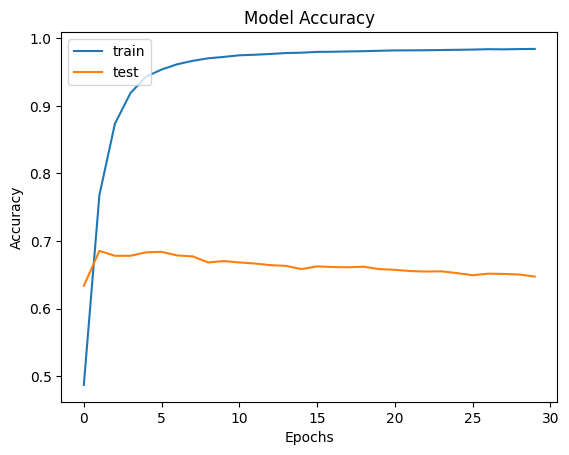

In [60]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

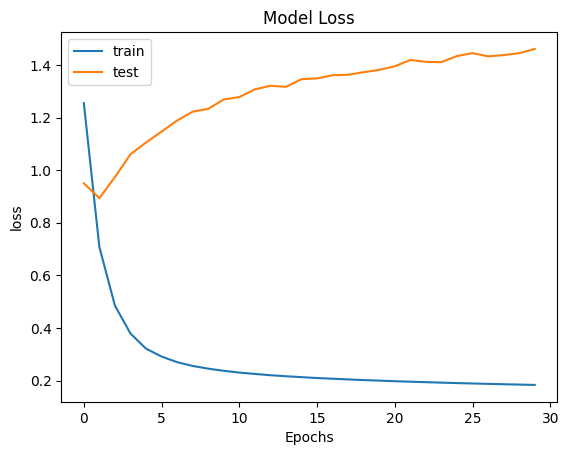

In [61]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','test'], loc = 'upper left')
plt.show

In [63]:
prediction = model.predict(X_test)

119/119 [==============================] - 0s 2ms/step


In [65]:
tweet = "Amazing news! Researchers just announced a breakthrough in the search for a COVID-19 vaccine. There's hope on the horizon! ðŸŒŸ #VaccineHope #CovidBreakthrough"
tokenized_review = tokenizer.texts_to_sequences([tweet])
padded_tweet = pad_sequences(tokenized_review, maxlen=50)


In [67]:
pred = model.predict(padded_tweet)
print(pred)

1/1 [==============================] - 0s 54ms/step
[[2.2506084e-04 6.1481697e-03 5.2314712e-04 9.9310356e-01 1.8196410e-09]]


In [68]:
predicted_class_index = np.argmax(pred)
print(predicted_class_index)

3


In [69]:
for key, value in sentiment_mapping.items():
    if value == predicted_class_index:
        print(f"The predicted sentiment is: {key}")
    

The predicted sentiment is: Extremely Positive
